In [114]:
from keras.models import Model
from keras.layers import BatchNormalization,Add,add,Input,concatenate,Concatenate,Conv2D,MaxPooling2D,DepthwiseConv2D,Activation,UpSampling2D
from keras.layers import Lambda
from keras.utils.vis_utils import model_to_dot,plot_model
from IPython.display import SVG

In [115]:
concat_layers=[]

In [116]:
def down_sample_block(previous_layer,n_filters,kernel_value,stride_value):
    block=Conv2D(filters=n_filters,kernel_size=kernel_value,strides=stride_value,padding='same')(previous_layer)
    block=Activation(activation='relu')(block)
    block=Conv2D(filters=n_filters,kernel_size=kernel_value,strides=stride_value,padding='same')(block)
    block=Activation(activation='relu')(block)
    concat_layers.append(block)
    block=MaxPooling2D(pool_size=(2,2))(block)
    return block
    

In [117]:
def up_sample_block(previous_layer,n_filters,kernel_value,stride_value):
    block=UpSampling2D(size=(2,2),interpolation='nearest')(previous_layer)
    block=concatenate([concat_layers.pop(),block])
    block=Conv2D(filters=n_filters,kernel_size=kernel_value,strides=stride_value,padding='same')(block)
    block=Activation(activation='relu')(block)
    block=Conv2D(filters=n_filters,kernel_size=kernel_value,strides=stride_value,padding='same')(block)
    block=Activation(activation='relu')(block)
    return block
    

In [118]:
def UNet(f1,layers):
    for i in f1:
        layers=down_sample_block(layers,i,(3,3),(1,1))
    for i in reversed(f1):
        layers=up_sample_block(layers,i,(3,3),(1,1))
    return layers

In [120]:
filters=[64,128,256,512]
input_layer=Input(shape=(512,512,3))
output_layer=UNet(filters,input_layer)
model=Model(input_layer,output_layer)

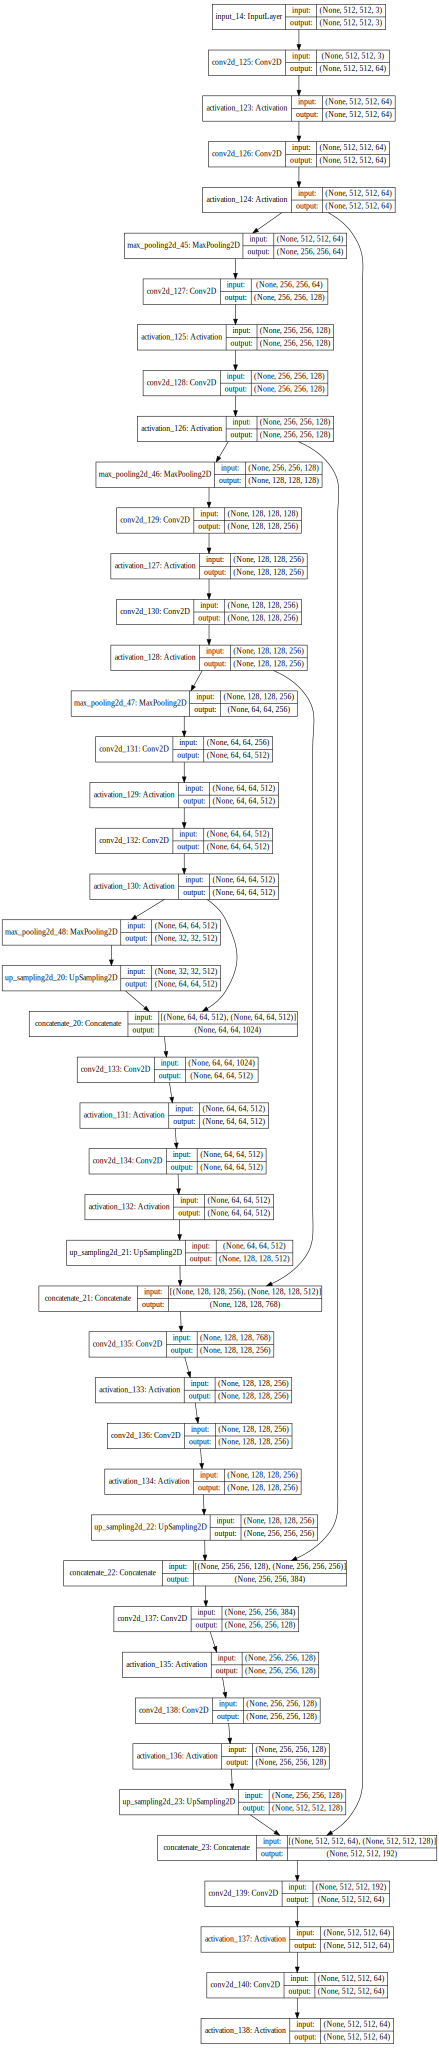

In [121]:
SVG(model_to_dot(model,show_layer_names=True,show_shapes=True,rankdir='LB').create(prog='dot',format='svg'))